# siRNA Gene inhibition Predictor

Name: Ferry Marcellus Suhendra

### Introduction

RNA interference is an important biological mechanism to repress gene expression in eukaryotic organism. inhibition of mRNA by endogenous miRNA or by exogenous siRNA. Usage of siRNA is an interesting drug mechanism to use in gene induced disease. effectivity of siRNA in represing a gene can be measured by looking at its thermodynamic stability.

#### Problem

create a prediction model predicting the effectiveness of miRNA inhibition on gene expression activity.

### Import Libraries

In [649]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
import pickle


### Data Loading

the dataset used in this analysis is taken from kaggle open dataset with the following link:

https://www.kaggle.com/datasets/livtoft/sirna-activity

Based of the data source each column in the dataset means as follow:

1. Targer seq : GenBank code for the target gene sequence
2. Start      : siRNA start position on the target sequence
3. End        : siRNA end position on the target sequence
4. Sequence   : Fasta sequence of the siRNA
5. G          : Guanine content 
6. U          : Uracil content
7. bi         : Stability of dimers with antisense strand
8. uni        : Antisense strand intra-molecular stability
9. duplex     : overall sense-antisense pair stability
10. pos n     : stability of sense-antisense base pairs in position n
11. Dif_5-3   : Stability difference in position 1 and 18
12. Content+  : Preffered dinucleotide content
13. Content-  : Avoided dinucleotide content
14. Cons+     : Preffered position-dependent nucleotide consensus
15. Cons-     : Avoided position-dependent nucleotide consensus
16. Cons_sum  : Sum of the position-dependent nucleotide consensus
17. Hyb19     : Potential target copies number in mRNA
18. target    : Stabilities of mRNA local target
19. Activity  : Gene expression activity of the target mRNA in percentage (100% means there is no change in mRNA gene activity)

Activity is the target data for this modeling. Studies done using this dataset states that Activity values below 30 is considered good inhibition by the siRNA. the activity cloumn will be thusly categorized.

In [650]:
#expanding table lenght
pd.set_option('display.max_columns', 100)
# Loading Dataframe
df=pd.read_csv('h8dsft_Milestone2P1_FerryMSuhendra.csv')
df

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Activity
0,M60857,195,213,AUUAUCCACUGUUUUUGGA,3,9,-7.0,-1.9,-28.1,-1.1,-0.9,-3.3,-0.9,-0.9,-2.4,-1.3,2,6,2,6,4,0.001175,-8.1,24.7
1,M60857,197,215,AAAUUAUCCACUGUUUUUG,2,9,-0.7,0.0,-24.2,-0.9,-0.9,-1.1,-2.2,-0.9,-2.1,-1.2,1,6,1,5,4,0.001175,-8.1,9.8
2,M60857,199,217,CAAAAUUAUCCACUGUUUU,1,8,-1.5,0.0,-24.2,-2.1,-0.9,-0.9,-2.1,-2.1,-0.9,1.2,2,5,3,2,-1,0.001175,-11.4,50.5
3,M60857,201,219,CACAAAAUUAUCCACUGUU,1,6,-0.6,0.0,-26.7,-2.1,-2.2,-0.9,-2.1,-2.2,-0.9,1.2,3,3,3,3,0,0.001175,-14.5,83.7
4,M60857,203,221,GCCACAAAAUUAUCCACUG,2,4,-0.1,0.0,-30.3,-3.4,-3.3,-0.9,-2.4,-3.3,-2.1,1.3,4,2,2,3,1,0.001175,-17.8,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,M33197,717,735,GUUCAGCUCAGGGAUGACC,6,4,-9.0,-0.3,-37.8,-2.2,-0.9,-3.4,-2.4,-1.1,-3.3,-1.1,5,3,8,6,-2,0.000789,-15.1,26.0
649,M33197,837,855,CGCCUGCUUCACCACCUUC,2,5,-2.8,0.0,-38.6,-2.4,-3.4,-3.4,-2.1,-2.2,-2.4,0.0,4,4,5,3,-2,0.000789,-24.8,48.0
650,M33197,972,990,GAGCUUGACAAAGUGGUCG,7,4,-7.9,-2.3,-34.1,-2.4,-2.1,-2.1,-2.2,-2.1,-2.4,0.0,3,2,5,4,-1,0.000789,-5.2,36.0
651,M33197,1008,1026,GUUGCUGUAGCCAAAUUCG,5,6,-9.5,-0.3,-31.7,-2.2,-0.9,-2.1,-0.9,-0.9,-2.4,-0.2,3,3,2,4,2,0.000789,-11.6,25.0


In [651]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Target seq  653 non-null    object 
 1   Start       653 non-null    int64  
 2   End         653 non-null    int64  
 3   Sequence    653 non-null    object 
 4   G           653 non-null    int64  
 5   U           653 non-null    int64  
 6   bi          653 non-null    float64
 7   uni         653 non-null    float64
 8   duplex      653 non-null    float64
 9   Pos1        653 non-null    float64
 10  Pos2        653 non-null    float64
 11  Pos6        653 non-null    float64
 12  Pos13       653 non-null    float64
 13  Pos14       653 non-null    float64
 14  Pos18       653 non-null    float64
 15  Dif_5-3     653 non-null    float64
 16  Content+    653 non-null    int64  
 17  Content-    653 non-null    int64  
 18  Cons+       653 non-null    int64  
 19  Cons-       653 non-null    i

In [652]:
# replacing activities values to categorical
act=np.where(df['Activity'] < 30,1,0)
act_df=pd.DataFrame(act,columns=['Performance'])
df=pd.concat([df,act_df], axis=1)
df.drop(['Activity'],axis=1,inplace=True)
df

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Performance
0,M60857,195,213,AUUAUCCACUGUUUUUGGA,3,9,-7.0,-1.9,-28.1,-1.1,-0.9,-3.3,-0.9,-0.9,-2.4,-1.3,2,6,2,6,4,0.001175,-8.1,1
1,M60857,197,215,AAAUUAUCCACUGUUUUUG,2,9,-0.7,0.0,-24.2,-0.9,-0.9,-1.1,-2.2,-0.9,-2.1,-1.2,1,6,1,5,4,0.001175,-8.1,1
2,M60857,199,217,CAAAAUUAUCCACUGUUUU,1,8,-1.5,0.0,-24.2,-2.1,-0.9,-0.9,-2.1,-2.1,-0.9,1.2,2,5,3,2,-1,0.001175,-11.4,0
3,M60857,201,219,CACAAAAUUAUCCACUGUU,1,6,-0.6,0.0,-26.7,-2.1,-2.2,-0.9,-2.1,-2.2,-0.9,1.2,3,3,3,3,0,0.001175,-14.5,0
4,M60857,203,221,GCCACAAAAUUAUCCACUG,2,4,-0.1,0.0,-30.3,-3.4,-3.3,-0.9,-2.4,-3.3,-2.1,1.3,4,2,2,3,1,0.001175,-17.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,M33197,717,735,GUUCAGCUCAGGGAUGACC,6,4,-9.0,-0.3,-37.8,-2.2,-0.9,-3.4,-2.4,-1.1,-3.3,-1.1,5,3,8,6,-2,0.000789,-15.1,1
649,M33197,837,855,CGCCUGCUUCACCACCUUC,2,5,-2.8,0.0,-38.6,-2.4,-3.4,-3.4,-2.1,-2.2,-2.4,0.0,4,4,5,3,-2,0.000789,-24.8,0
650,M33197,972,990,GAGCUUGACAAAGUGGUCG,7,4,-7.9,-2.3,-34.1,-2.4,-2.1,-2.1,-2.2,-2.1,-2.4,0.0,3,2,5,4,-1,0.000789,-5.2,0
651,M33197,1008,1026,GUUGCUGUAGCCAAAUUCG,5,6,-9.5,-0.3,-31.7,-2.2,-0.9,-2.1,-0.9,-0.9,-2.4,-0.2,3,3,2,4,2,0.000789,-11.6,1


### Exploratory Data Analysis


In [653]:
# checking dataset values
df.describe()

,Start,End,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Performance
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,972.715161,990.715161,4.362940,5.422665,-7.446095,-1.106432,-34.111639,-2.060337,-2.086371,-2.149923,-2.183002,-2.109035,-2.174119,-0.113783,3.267994,3.165391,3.866769,3.687596,-0.179173,0.000628,-15.422052,0.442573
std,769.976871,769.976871,1.975689,2.326608,4.678564,1.491547,4.365093,0.763692,0.768782,0.762777,0.734368,0.746954,0.772666,1.043763,1.852747,2.086378,1.660350,1.554861,2.769808,0.000386,6.661961,0.497072
min,1.000000,19.000000,0.000000,0.000000,-26.600000,-7.900000,-49.900000,-3.400000,-3.400000,-3.400000,-3.400000,-3.400000,-3.400000,-2.500000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000089,-37.200000,0.000000
25%,329.000000,347.000000,3.000000,4.000000,-9.900000,-1.900000,-36.700000,-2.400000,-2.400000,-2.400000,-2.400000,-2.400000,-2.400000,-1.000000,2.000000,2.000000,3.000000,3.000000,-2.000000,0.000335,-20.100000,0.000000
50%,779.000000,797.000000,4.000000,5.000000,-7.000000,-0.300000,-33.700000,-2.100000,-2.100000,-2.100000,-2.200000,-2.100000,-2.100000,0.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000549,-14.600000,0.000000
75%,1504.000000,1522.000000,6.000000,7.000000,-4.000000,0.000000,-31.000000,-1.300000,-1.300000,-2.100000,-2.100000,-2.100000,-2.100000,0.300000,4.000000,4.000000,5.000000,5.000000,2.000000,0.000779,-10.600000,1.000000
max,5524.000000,5542.000000,12.000000,13.000000,4.100000,0.000000,-22.300000,-0.900000,-0.900000,-0.900000,-0.900000,-0.900000,-0.900000,2.400000,12.000000,10.000000,9.000000,8.000000,7.000000,0.002350,0.000000,1.000000


In [654]:
# checking for correlation with income bracket within numeric columns
df.corr().nlargest(24, 'Performance')['Performance']

Performance    1.000000
Cons_Sum       0.389655
Cons-          0.347845
Content-       0.198472
Hyb19          0.189453
Pos1           0.176309
U              0.158945
Pos13          0.156248
Pos2           0.131087
uni            0.117003
bi             0.114505
target         0.111424
Pos14          0.104557
Pos6           0.100433
duplex         0.089393
End           -0.140640
Start         -0.140640
G             -0.141948
Content+      -0.172285
Pos18         -0.195594
Dif_5-3       -0.273792
Cons+         -0.324279
Name: Performance, dtype: float64

Looking at the correlations, it is found that all columns have some relations with performance with the exception of duplex.

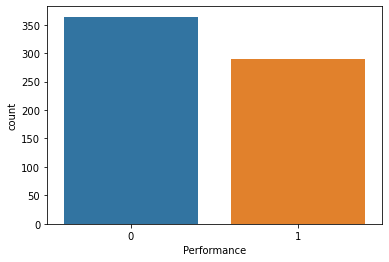

In [655]:
#checking target distribution
sns.countplot(x='Performance',data=df)
plt.show()

Target data is somewhat balanced and does not need treatment.

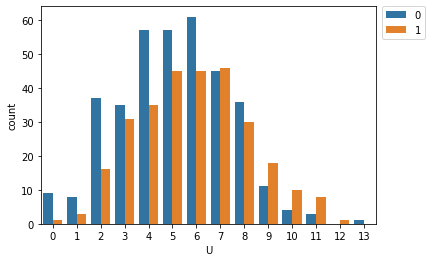

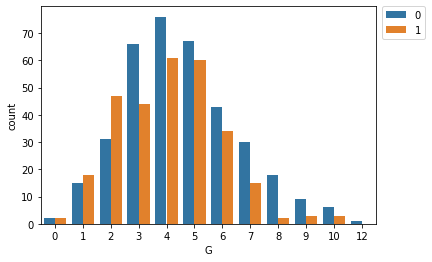

In [656]:
#checking U content by performance
sns.countplot(x='U',data=df, hue= 'Performance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
#checking G content by performance
sns.countplot(x='G',data=df, hue= 'Performance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

siRNA with more Uracil content shows better performance than ones with less. siRNA with more Guanine content shows less performance.

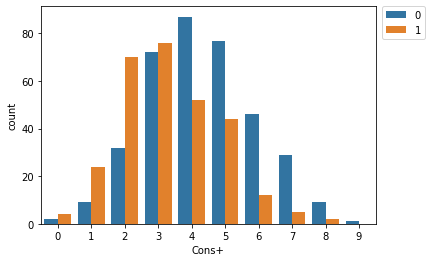

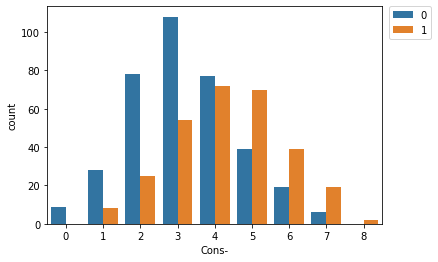

In [657]:
#checking Preffered nucleotide consensus by performance
sns.countplot(x='Cons+',data=df, hue= 'Performance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
#checking Avoided nucleotide consensus by performance
sns.countplot(x='Cons-',data=df, hue= 'Performance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

siRNA performed better in inhibiting mRNA when it avoids more nucleotide consensus.

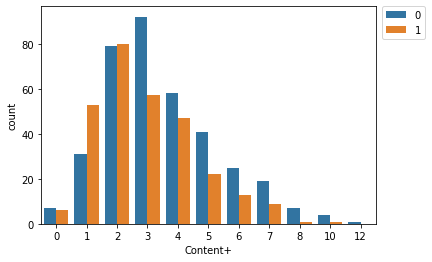

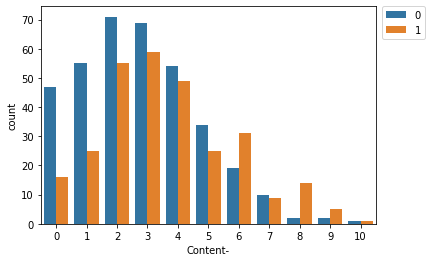

In [658]:
#checking Preffered dinucleotide content by performance
sns.countplot(x='Content+',data=df, hue= 'Performance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
#checking Avoided dinucleotide content by performance
sns.countplot(x='Content-',data=df, hue= 'Performance')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

siRNA with more avoided dinucleotide content results in better performance.

### Data Preprocessing


In [659]:
# separating inference data
df_inf = df.sample(10, random_state=32)
# reseting index
df_inf.reset_index(drop=True, inplace=True)
df_inf

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Performance
0,NM_000314,1088,1106,CAAGUCUAAGUCGAAUCCA,3,4,-3.6,0.0,-31.2,-2.1,-0.9,-2.1,-2.4,-0.9,-2.1,0.0,2,3,3,5,2,0.000293,-8.8,0
1,J03132,2831,2849,CUGAGGUGGGAGGAUCACU,8,4,-9.8,-3.0,-38.9,-2.1,-2.1,-2.2,-2.4,-1.1,-2.1,0.0,5,1,7,4,-3,0.000335,-20.6,0
2,NM_144586,1158,1176,AUUCUGCUGCAGAGAAUGG,6,5,-18.1,-2.1,-34.0,-1.1,-0.9,-3.4,-2.1,-2.4,-3.3,-2.2,4,2,5,4,-1,0.000529,-24.4,0
3,M60857,233,251,UAGCCAAAUCCUUUCUCUC,1,7,-0.3,0.0,-32.0,-1.3,-2.1,-0.9,-0.9,-2.4,-2.4,-1.1,2,6,0,6,6,0.001175,-28.8,1
4,NM_000875,423,441,GUUGUAAAGCCCAAUAUCC,3,5,-2.0,0.0,-30.7,-2.2,-0.9,-0.9,-0.9,-1.1,-3.3,-1.1,2,2,1,7,6,0.000200,-11.5,0
5,LaminA,96,114,GAGCUCCUGCAGGUCCUCC,5,4,-23.7,-4.5,-42.4,-2.4,-2.1,-3.3,-2.2,-2.4,-3.3,-0.9,4,3,5,4,-1,0.000337,-21.3,1
6,J03132,321,339,UGAAUAGCACAUUGGUUGG,6,6,-6.7,-0.7,-31.5,-2.1,-2.4,-2.1,-2.1,-3.3,-3.3,-1.2,5,2,4,3,-1,0.000335,-5.0,0
7,M60857,297,315,CCUGGUGAAGUCUCCGCCC,5,4,-13.8,-3.6,-41.2,-3.3,-2.1,-2.1,-2.4,-3.3,-3.3,0.0,2,2,4,5,1,0.001175,-18.0,1
8,M60857,227,245,AAUCCUUUCUCUCCUGUAG,2,8,-1.1,0.0,-32.0,-0.9,-1.1,-0.9,-3.3,-2.1,-2.1,-1.2,0,6,2,3,1,0.001175,-23.3,1
9,NM_002037,1192,1210,CAUUGUCAAGUUUGCGAAU,4,7,-9.1,0.0,-28.1,-2.1,-1.1,-2.4,-2.1,-3.4,-1.1,1.0,3,4,6,2,-4,0.000377,-9.6,0


In [660]:
# separating inferential data from dataframe
dftt = df.drop(df_inf.index)
# reseting index
dftt.reset_index(drop=True, inplace=True)
dftt

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Performance
0,M60857,215,233,CCUGUAGCUAAGGCCACAA,4,3,-11.5,-3.2,-36.1,-3.3,-2.1,-2.1,-3.4,-3.3,-0.9,2.4,5,0,7,4,-3,0.001175,-13.8,0
1,M60857,217,235,CUCCUGUAGCUAAGGCCAC,4,4,-11.6,-1.4,-37.6,-2.1,-2.4,-2.2,-2.1,-3.3,-2.2,-0.1,4,1,3,5,2,0.001175,-18.3,0
2,M60857,219,237,CUCUCCUGUAGCUAAGGCC,4,5,-11.6,-1.4,-37.8,-2.1,-2.4,-2.1,-1.3,-0.9,-3.3,-1.2,3,2,2,7,5,0.001175,-22.8,1
3,M60857,221,239,UUCUCUCCUGUAGCUAAGG,4,7,-13.6,-1.0,-34.4,-0.9,-2.4,-2.4,-3.4,-2.1,-3.3,-2.4,2,4,4,2,-2,0.001175,-19.9,1
4,M60857,223,241,CUUUCUCUCCUGUAGCUAA,2,8,-6.6,0.0,-32.0,-2.1,-0.9,-2.4,-1.3,-2.1,-0.9,1.2,1,5,4,4,0,0.001175,-21.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,M33197,717,735,GUUCAGCUCAGGGAUGACC,6,4,-9.0,-0.3,-37.8,-2.2,-0.9,-3.4,-2.4,-1.1,-3.3,-1.1,5,3,8,6,-2,0.000789,-15.1,1
639,M33197,837,855,CGCCUGCUUCACCACCUUC,2,5,-2.8,0.0,-38.6,-2.4,-3.4,-3.4,-2.1,-2.2,-2.4,0.0,4,4,5,3,-2,0.000789,-24.8,0
640,M33197,972,990,GAGCUUGACAAAGUGGUCG,7,4,-7.9,-2.3,-34.1,-2.4,-2.1,-2.1,-2.2,-2.1,-2.4,0.0,3,2,5,4,-1,0.000789,-5.2,0
641,M33197,1008,1026,GUUGCUGUAGCCAAAUUCG,5,6,-9.5,-0.3,-31.7,-2.2,-0.9,-2.1,-0.9,-0.9,-2.4,-0.2,3,3,2,4,2,0.000789,-11.6,1


In [661]:
# Splitting features and target

x = dftt.drop(['Performance'], axis=1) 
y = dftt['Performance']
x

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target
0,M60857,215,233,CCUGUAGCUAAGGCCACAA,4,3,-11.5,-3.2,-36.1,-3.3,-2.1,-2.1,-3.4,-3.3,-0.9,2.4,5,0,7,4,-3,0.001175,-13.8
1,M60857,217,235,CUCCUGUAGCUAAGGCCAC,4,4,-11.6,-1.4,-37.6,-2.1,-2.4,-2.2,-2.1,-3.3,-2.2,-0.1,4,1,3,5,2,0.001175,-18.3
2,M60857,219,237,CUCUCCUGUAGCUAAGGCC,4,5,-11.6,-1.4,-37.8,-2.1,-2.4,-2.1,-1.3,-0.9,-3.3,-1.2,3,2,2,7,5,0.001175,-22.8
3,M60857,221,239,UUCUCUCCUGUAGCUAAGG,4,7,-13.6,-1.0,-34.4,-0.9,-2.4,-2.4,-3.4,-2.1,-3.3,-2.4,2,4,4,2,-2,0.001175,-19.9
4,M60857,223,241,CUUUCUCUCCUGUAGCUAA,2,8,-6.6,0.0,-32.0,-2.1,-0.9,-2.4,-1.3,-2.1,-0.9,1.2,1,5,4,4,0,0.001175,-21.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,M33197,717,735,GUUCAGCUCAGGGAUGACC,6,4,-9.0,-0.3,-37.8,-2.2,-0.9,-3.4,-2.4,-1.1,-3.3,-1.1,5,3,8,6,-2,0.000789,-15.1
639,M33197,837,855,CGCCUGCUUCACCACCUUC,2,5,-2.8,0.0,-38.6,-2.4,-3.4,-3.4,-2.1,-2.2,-2.4,0.0,4,4,5,3,-2,0.000789,-24.8
640,M33197,972,990,GAGCUUGACAAAGUGGUCG,7,4,-7.9,-2.3,-34.1,-2.4,-2.1,-2.1,-2.2,-2.1,-2.4,0.0,3,2,5,4,-1,0.000789,-5.2
641,M33197,1008,1026,GUUGCUGUAGCCAAAUUCG,5,6,-9.5,-0.3,-31.7,-2.2,-0.9,-2.1,-0.9,-0.9,-2.4,-0.2,3,3,2,4,2,0.000789,-11.6


#### Feature selection

for this modeling, every data will be used as features. this is because all features have some significant relation with the target data. Instead, dimentionality will be reduced using PCA method to make sure the model runs optimally.

In [662]:
# Dropping non feature values
x = x.drop(['Target seq','Sequence'], axis=1) 

# Splitting training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=32,stratify=y)

print('Train Size : ', x_train.shape)
print('Test Size  : ', x_test.shape)

Train Size :  (578, 21)
Test Size  :  (65, 21)


In [663]:
# scaling the data
scaler=StandardScaler()
scaler.fit(x_train)
xs_train=scaler.transform(x_train)
xs_test=scaler.transform(x_test)
xs_train=pd.DataFrame(xs_train, columns=x.columns)
xs_test=pd.DataFrame(xs_test, columns=x.columns)
xs_train

,Start,End,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target
0,1.636272,1.636272,0.806563,-1.044132,-0.613272,-1.289159,0.031227,-0.044570,-0.020046,0.084091,0.135880,-0.363216,-0.292474,-0.183036,-0.138169,-0.561789,0.649858,-0.449815,-0.642515,-0.860791,-1.030564
1,-0.907971,-0.907971,0.294825,0.247255,0.705889,0.681747,0.421602,-0.176681,-0.415047,0.084091,0.000934,-0.363216,-1.475560,-0.958802,-0.670581,-0.083565,0.051740,-1.093362,-0.642515,1.402441,1.354783
2,-0.232783,-0.232783,-0.216913,-0.183207,0.259076,-0.697887,0.214933,-1.629895,-1.731718,1.673337,0.135880,1.648979,-1.475560,0.107876,-0.138169,0.394659,-1.144496,0.837279,1.156775,-0.757306,0.132293
3,0.513545,0.513545,-0.216913,-0.183207,0.450567,0.747444,-0.152479,-0.044570,1.296625,-0.313221,1.755234,1.380686,-1.475560,-1.055773,-0.670581,-0.083565,0.051740,-1.093362,-0.642515,-0.695972,-1.656718
4,0.823976,0.823976,-0.728652,1.108180,-0.826040,-0.303706,0.421602,-1.629895,-0.020046,1.408463,-0.268959,0.039223,0.101888,1.271524,-1.202992,0.872882,-0.546378,0.837279,0.796917,-0.066447,-1.641809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,-0.536747,-0.536747,0.294825,-0.183207,-0.655826,-0.106615,-0.772486,-0.440901,-0.020046,-0.313221,1.755234,0.039223,0.101888,0.398788,0.926654,-0.561789,-0.546378,2.124374,1.516633,2.391163,-1.641809
574,-0.773451,-0.773451,0.294825,0.677718,0.259076,0.747444,0.283822,-1.629895,-0.415047,-0.048346,0.135880,-0.094924,-0.292474,0.980612,-0.670581,0.394659,0.649858,-1.736909,-1.362230,1.402441,-0.061517
575,-0.712658,-0.712658,-0.216913,0.677718,0.684612,-0.435100,-0.451001,-0.044570,-0.415047,-0.048346,0.135880,-1.570534,-1.475560,-1.055773,-0.670581,0.394659,-0.546378,0.193732,0.437059,0.383041,0.609362
576,2.554631,2.554631,0.294825,-1.044132,0.535675,0.747444,0.651234,1.012313,1.559959,0.084091,0.135880,-0.094924,-1.475560,-1.831538,0.394243,-1.040013,-1.144496,-1.093362,0.077201,-0.762248,1.742402


In [664]:
# checking for optimal PCA dimension

vif=pd.DataFrame()
vif['features'] = xs_train.columns
vif['VIF'] = [variance_inflation_factor(xs_train, i) for i in range(xs_train.shape[1])]

vif

c:\Users\Ferry Marcellus\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,Start,inf
1,End,inf
2,G,2.331482
3,U,5.758901
4,bi,2.085786
5,uni,2.118778
6,duplex,3.819118
7,Pos1,inf
8,Pos2,1.342776
9,Pos6,1.514553


it is found that there 9 VIF values above 5. this may sugest that the dimontions will be reduced to 9 durring PCA.

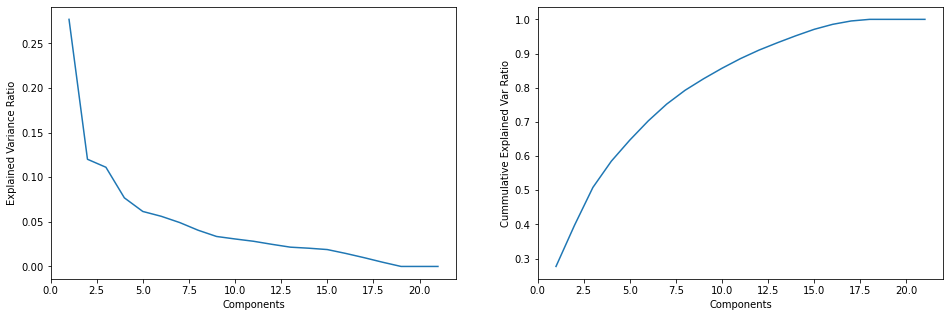

In [665]:
# checking for EVR
pca=PCA(n_components=21)
pca.fit(xs_train)
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,22),pca.explained_variance_ratio_)
ax[0].set_xlabel('Components')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,22),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Components')
ax[1].set_ylabel('Cummulative Explained Var Ratio')
plt.show()

EVR plotting shows that by taking 9 components, the cummulative EVR stays above 0.8.

In [666]:
# reducing dimensions
pca=PCA(n_components=9)
pca.fit(xs_train)
xp_train= pca.transform(xs_train)
xp_test= pca.transform(xs_test)

### Model Definition

for this modeling, K-Nearest Neighbors, Decision Tree, Random Forest, and AdaBoost.

In [667]:
# defining model
knn_model= KNeighborsClassifier()
svm_model= SVC(probability=True)
dt_model = DecisionTreeClassifier(random_state=32)
rf_model = RandomForestClassifier(random_state=32)
ada_model= AdaBoostClassifier(random_state=32)

### Model Training and Hyperparameter Tuning

In [668]:
# checking cross validation score
cv_knn_model = cross_val_score(knn_model, xp_train, y_train, cv=3, scoring='roc_auc')
cv_svm_model =cross_val_score(svm_model, xp_train, y_train, cv=3, scoring='roc_auc')
cv_dt_model = cross_val_score(dt_model, xp_train, y_train, cv=3, scoring='roc_auc')
cv_rf_model = cross_val_score(rf_model, xp_train, y_train, cv=3, scoring='roc_auc')
cv_ada_model = cross_val_score(ada_model, xp_train, y_train, cv=3, scoring='roc_auc')
cvh=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_ada_model],['knn_model','svm_model','dt_model','rf_model','ada_model']):
    print(name)
    print('ROC-AUC - All - Cross Validation  : ', cv)
    print('ROC-AUC - Mean - Cross Validation : ', cv.mean())
    print('ROC-AUC - Std - Cross Validation  : ', cv.std())
    print('ROC-AUC - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cvh:
        cvh= cv.mean()
        nameh=name
    else:
        continue
print ('best model:', nameh)
print('cross-val mean:', cvh)

knn_model
ROC-AUC - All - Cross Validation  :  [0.69803922 0.68311237 0.70890599]
ROC-AUC - Mean - Cross Validation :  0.6966858582888347
ROC-AUC - Std - Cross Validation  :  0.010573597947942407
ROC-AUC - Range of Test-Set       :  0.6861122603408922 - 0.7072594562367771
--------------------------------------------------
svm_model
ROC-AUC - All - Cross Validation  :  [0.78529412 0.74918496 0.70753161]
ROC-AUC - Mean - Cross Validation :  0.7473368960711865
ROC-AUC - Std - Cross Validation  :  0.03177329458718657
ROC-AUC - Range of Test-Set       :  0.7155636014839999 - 0.7791101906583731
--------------------------------------------------
dt_model
ROC-AUC - All - Cross Validation  :  [0.59052288 0.55705281 0.63886751]
ROC-AUC - Mean - Cross Validation :  0.5954810666810616
ROC-AUC - Std - Cross Validation  :  0.033584210800006495
ROC-AUC - Range of Test-Set       :  0.5618968558810551 - 0.6290652774810681
--------------------------------------------------
rf_model
ROC-AUC - All - Cross

from the cross validation of ROC-AUC score, it is found that SVM model shows the best result by default.

In [669]:
# defining hyperparameters for tuning
param_grid = {
    'C': [0.05,0.25,0.5,1,1.5,2,3,5,10],
    'kernel':['linear','poly','rbf','sigmoid'],
    'max_iter': [-1,1000,10000,100000,1000000],
    'gamma': ['scale','auto'], 
}


In [670]:
# Training using grid search
svm_gridcv = GridSearchCV(estimator=SVC(probability=True),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='roc_auc')

svm_gridcv.fit(xp_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.05, 0.25, 0.5, 1, 1.5, 2, 3, 5, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1, 1000, 10000, 100000, 1000000]},
             scoring='roc_auc', verbose=2)

In [671]:
# Displaying best hyperparameters
print(svm_gridcv.best_params_)
# retrieving the best model
svm_gridcv_best = svm_gridcv.best_estimator_

{'C': 0.05, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1}


### Model Evaluation

Training
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       322
           1       0.78      0.50      0.61       256

    accuracy                           0.72       578
   macro avg       0.73      0.69      0.69       578
weighted avg       0.73      0.72      0.70       578

ROC AUC Score: 0.8339843749999999


Test
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        36
           1       0.82      0.48      0.61        29

    accuracy                           0.72        65
   macro avg       0.76      0.70      0.70        65
weighted avg       0.75      0.72      0.71        65

ROC AUC Score: 0.8237547892720306


c:\Users\Ferry Marcellus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


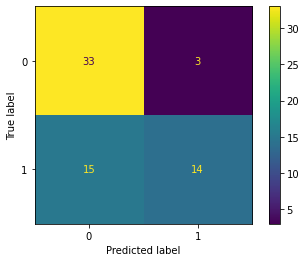

In [672]:
# creating prediction data
svm_y_pred_train = svm_gridcv_best.predict(xp_train)
svm_y_pred_test = svm_gridcv_best.predict(xp_test)
svm_y_proba_train = svm_gridcv_best.predict_proba(xp_train)
svm_y_proba_test = svm_gridcv_best.predict_proba(xp_test)

# Evaluating the first decision tree model
print("Training")
print(classification_report(y_train,svm_y_pred_train))
print('ROC AUC Score:',roc_auc_score(y_train,svm_y_proba_train[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,svm_y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,svm_y_proba_test[:,1]))

# Plotting confusion matrix
plot_confusion_matrix(svm_gridcv_best, xp_test, y_test) 

From the ROC-AUC score calculation, the model is found to be fit. but, the model seems to have difficulty predicting siRNA with good inhibition performance as seen by the recall value. but this is a more prefferable outcome than the model mislabeling siRNA with bad performance as good performance. precission value shows that the model rarely mislabel and therefore can be used to predict siRNA performance.

### Model Inference

In [673]:
# displaying inference data
df_inf

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Performance
0,NM_000314,1088,1106,CAAGUCUAAGUCGAAUCCA,3,4,-3.6,0.0,-31.2,-2.1,-0.9,-2.1,-2.4,-0.9,-2.1,0.0,2,3,3,5,2,0.000293,-8.8,0
1,J03132,2831,2849,CUGAGGUGGGAGGAUCACU,8,4,-9.8,-3.0,-38.9,-2.1,-2.1,-2.2,-2.4,-1.1,-2.1,0.0,5,1,7,4,-3,0.000335,-20.6,0
2,NM_144586,1158,1176,AUUCUGCUGCAGAGAAUGG,6,5,-18.1,-2.1,-34.0,-1.1,-0.9,-3.4,-2.1,-2.4,-3.3,-2.2,4,2,5,4,-1,0.000529,-24.4,0
3,M60857,233,251,UAGCCAAAUCCUUUCUCUC,1,7,-0.3,0.0,-32.0,-1.3,-2.1,-0.9,-0.9,-2.4,-2.4,-1.1,2,6,0,6,6,0.001175,-28.8,1
4,NM_000875,423,441,GUUGUAAAGCCCAAUAUCC,3,5,-2.0,0.0,-30.7,-2.2,-0.9,-0.9,-0.9,-1.1,-3.3,-1.1,2,2,1,7,6,0.000200,-11.5,0
5,LaminA,96,114,GAGCUCCUGCAGGUCCUCC,5,4,-23.7,-4.5,-42.4,-2.4,-2.1,-3.3,-2.2,-2.4,-3.3,-0.9,4,3,5,4,-1,0.000337,-21.3,1
6,J03132,321,339,UGAAUAGCACAUUGGUUGG,6,6,-6.7,-0.7,-31.5,-2.1,-2.4,-2.1,-2.1,-3.3,-3.3,-1.2,5,2,4,3,-1,0.000335,-5.0,0
7,M60857,297,315,CCUGGUGAAGUCUCCGCCC,5,4,-13.8,-3.6,-41.2,-3.3,-2.1,-2.1,-2.4,-3.3,-3.3,0.0,2,2,4,5,1,0.001175,-18.0,1
8,M60857,227,245,AAUCCUUUCUCUCCUGUAG,2,8,-1.1,0.0,-32.0,-0.9,-1.1,-0.9,-3.3,-2.1,-2.1,-1.2,0,6,2,3,1,0.001175,-23.3,1
9,NM_002037,1192,1210,CAUUGUCAAGUUUGCGAAU,4,7,-9.1,0.0,-28.1,-2.1,-1.1,-2.4,-2.1,-3.4,-1.1,1.0,3,4,6,2,-4,0.000377,-9.6,0


In [674]:
# dropping non feature columns
dfa_inf=df_inf.drop(['Target seq','Sequence','Performance'], axis=1) 
dfa_inf

,Start,End,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target
0,1088,1106,3,4,-3.6,0.0,-31.2,-2.1,-0.9,-2.1,-2.4,-0.9,-2.1,0.0,2,3,3,5,2,0.000293,-8.8
1,2831,2849,8,4,-9.8,-3.0,-38.9,-2.1,-2.1,-2.2,-2.4,-1.1,-2.1,0.0,5,1,7,4,-3,0.000335,-20.6
2,1158,1176,6,5,-18.1,-2.1,-34.0,-1.1,-0.9,-3.4,-2.1,-2.4,-3.3,-2.2,4,2,5,4,-1,0.000529,-24.4
3,233,251,1,7,-0.3,0.0,-32.0,-1.3,-2.1,-0.9,-0.9,-2.4,-2.4,-1.1,2,6,0,6,6,0.001175,-28.8
4,423,441,3,5,-2.0,0.0,-30.7,-2.2,-0.9,-0.9,-0.9,-1.1,-3.3,-1.1,2,2,1,7,6,0.000200,-11.5
5,96,114,5,4,-23.7,-4.5,-42.4,-2.4,-2.1,-3.3,-2.2,-2.4,-3.3,-0.9,4,3,5,4,-1,0.000337,-21.3
6,321,339,6,6,-6.7,-0.7,-31.5,-2.1,-2.4,-2.1,-2.1,-3.3,-3.3,-1.2,5,2,4,3,-1,0.000335,-5.0
7,297,315,5,4,-13.8,-3.6,-41.2,-3.3,-2.1,-2.1,-2.4,-3.3,-3.3,0.0,2,2,4,5,1,0.001175,-18.0
8,227,245,2,8,-1.1,0.0,-32.0,-0.9,-1.1,-0.9,-3.3,-2.1,-2.1,-1.2,0,6,2,3,1,0.001175,-23.3
9,1192,1210,4,7,-9.1,0.0,-28.1,-2.1,-1.1,-2.4,-2.1,-3.4,-1.1,1.0,3,4,6,2,-4,0.000377,-9.6


In [675]:
# defining pipeline
pipe = Pipeline([("scaler", StandardScaler()),
                    ("pca",PCA(n_components=9)),
                    ("svm_model", SVC(C= 0.05, gamma='auto', kernel='poly', max_iter= -1))])

# fitting pipeline
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('svm_model', SVC(C=0.05, gamma='auto', kernel='poly'))])

In [676]:
# predicting inferential data using pipeline
dfa_inf_pred=pipe.predict(dfa_inf)
dfa_inf_pred_df=pd.DataFrame(dfa_inf_pred,columns=['Prediction'])
dfa_inf_pred_df

,Prediction
0,0
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,0


In [677]:
# displaying prediction result with inference data
pd.concat([df_inf,dfa_inf_pred_df],axis=1)

,Target seq,Start,End,Sequence,G,U,bi,uni,duplex,Pos1,Pos2,Pos6,Pos13,Pos14,Pos18,Dif_5-3,Content+,Content-,Cons+,Cons-,Cons_Sum,Hyb19,target,Performance,Prediction
0,NM_000314,1088,1106,CAAGUCUAAGUCGAAUCCA,3,4,-3.6,0.0,-31.2,-2.1,-0.9,-2.1,-2.4,-0.9,-2.1,0.0,2,3,3,5,2,0.000293,-8.8,0,0
1,J03132,2831,2849,CUGAGGUGGGAGGAUCACU,8,4,-9.8,-3.0,-38.9,-2.1,-2.1,-2.2,-2.4,-1.1,-2.1,0.0,5,1,7,4,-3,0.000335,-20.6,0,0
2,NM_144586,1158,1176,AUUCUGCUGCAGAGAAUGG,6,5,-18.1,-2.1,-34.0,-1.1,-0.9,-3.4,-2.1,-2.4,-3.3,-2.2,4,2,5,4,-1,0.000529,-24.4,0,0
3,M60857,233,251,UAGCCAAAUCCUUUCUCUC,1,7,-0.3,0.0,-32.0,-1.3,-2.1,-0.9,-0.9,-2.4,-2.4,-1.1,2,6,0,6,6,0.001175,-28.8,1,1
4,NM_000875,423,441,GUUGUAAAGCCCAAUAUCC,3,5,-2.0,0.0,-30.7,-2.2,-0.9,-0.9,-0.9,-1.1,-3.3,-1.1,2,2,1,7,6,0.000200,-11.5,0,1
5,LaminA,96,114,GAGCUCCUGCAGGUCCUCC,5,4,-23.7,-4.5,-42.4,-2.4,-2.1,-3.3,-2.2,-2.4,-3.3,-0.9,4,3,5,4,-1,0.000337,-21.3,1,1
6,J03132,321,339,UGAAUAGCACAUUGGUUGG,6,6,-6.7,-0.7,-31.5,-2.1,-2.4,-2.1,-2.1,-3.3,-3.3,-1.2,5,2,4,3,-1,0.000335,-5.0,0,0
7,M60857,297,315,CCUGGUGAAGUCUCCGCCC,5,4,-13.8,-3.6,-41.2,-3.3,-2.1,-2.1,-2.4,-3.3,-3.3,0.0,2,2,4,5,1,0.001175,-18.0,1,1
8,M60857,227,245,AAUCCUUUCUCUCCUGUAG,2,8,-1.1,0.0,-32.0,-0.9,-1.1,-0.9,-3.3,-2.1,-2.1,-1.2,0,6,2,3,1,0.001175,-23.3,1,1
9,NM_002037,1192,1210,CAUUGUCAAGUUUGCGAAU,4,7,-9.1,0.0,-28.1,-2.1,-1.1,-2.4,-2.1,-3.4,-1.1,1.0,3,4,6,2,-4,0.000377,-9.6,0,0


The model works fine in predicting siRNA performance.

### exporting data

In [678]:
# exporting pipeline
pickle.dump(pipe,open('pipe.pkl','wb'))

### Conclusions

1. Model predicting the performance of siRNA inhibition capabilities.
2. Cross validation result shows SVM as the best estimator based of the ROC-AUC score.
3. model improvenent using grid search to tune the models hyperparameter results in significant improvement compared to the default model.
4. the resulting model just fits and shows good precission in predicting performance.
5. future improvements can be done by introducing more data to the model, increasing its exposure to more train data.

#### References

Shabalina, S., Spiridonov, A., & Ogurtsov, A. (2006). BMC Bioinformatics, 7(1), 65. doi:10.1186/1471-2105-7-65 